## Imports and Drive access

In [ ]:
# imports
import pandas as pd
import numpy as np

In [ ]:
# colab Give access
'''
give Colab access to your google drive so you can access the df_clean.csv file
'''
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# colab Load data
'''
a copy of df_clean.csv must exist in your drive ** your own drive, because you can't access shared files **
'''

df_clean = pd.read_csv('/content/drive/My Drive/df_half_clean.csv') # this CSV file has been half cleaned (not pre-proceesed yet)

## Pre-Processing

In [ ]:
import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Normlization
def preprocessing(text):
  '''
  :type text: str
  :rtype: str
  '''
  text = re.sub(r'ى','ي', text)
  text = re.sub(r'ؤ','ء', text)
  text = re.sub(r'ئ','ء', text)
  text = re.sub(r'ة','ه', text)
  text = re.sub("[إأآا]", "ا", text)
  text = re.sub(r'گ','ك', text)
  # remove english letters
  text = re.sub(r'[A-Z a-z]',' ', text)
 
  # Remove longation # https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
  text = re.sub(r'(.)\1+', r"\1\1", text) 

  # remove numbers
  text = re.sub(r'[0-9]', ' ', text) 

  # remove things..    
  text = re.sub(r'► ∞  ı ▼ ل  ♥ ‡' , ' ', text) 
  text = re.sub(r'™ â  § ® © £ ± ç é í ó ú ü ñ ¿ ¡ Ŝ ħ ặ ť ħ ặ Ł ◌̇ ◌́ ◌̀ ◌̌ ◌̂ ◌̋ ◌̏ ◌̃ Я ǖ ợ đ Ḿ ĕ ṥ ђ ë' , ' ', text)


  # words = text.split()
  # text = " ".join(sorted(set(words), key = words.index))

  return text

In [ ]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Convert text to lowercases
    # text = text.lower()
    ## Remove numbers
    text = re.sub("\d+", " ", text)
  
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  

    return text

In [ ]:
# remove punctuations 

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
  translator = str.maketrans('', '', punctuations_list)
  return text.translate(translator)

In [ ]:
# Remove diacritics
#https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
  text = re.sub(arabic_diacritics, '', text)

  # tokens = nltk.sent_tokenize(text) # don't use this before w2v

  return text

In [ ]:
# Remove Stop Words

def nonStopWord(text):
  '''
  remove stop words and keep the rest
  https://stackoverflow.com/questions/42625084/does-nltk-contain-arabic-stop-word-if-not-how-can-i-add-it
  https://stackoverflow.com/questions/49193966/python-nltk-cannot-tokenize-arabic-text
  
  '''
  # text = text.decode('utf-8')
  sw = stopwords.words('arabic')
  tokens = nltk.word_tokenize(text)
  stopped_tokens = [i for i in tokens if not i in sw]
  
  # for item in stopped_tokens:
  #     print(item) # will print every word (i.e. token)
        
  return ' '.join(stopped_tokens) # not sure about the return 

In [ ]:
# function calls for: 1. preprocessing(text) 2. remove_diacritics(text) 3. nonStopWord(text)
# don't forget to run the function cells before this 
L  = []

for text in df_clean['text'].values:
  text = preprocessing(text) 
  text = clean_text(text)
  text = remove_punctuations(text) 
  text = remove_diacritics(text) 
  # text = nonStopWord(text)
  L.append(text)

  # the below lines to test cleaning for one story
  # print(text)
  # break

In [ ]:
df_text = pd.DataFrame(L, columns=['text'])

In [ ]:
df_text.to_csv('text_dataset.csv', index=False)

In [ ]:
df_text

,text
0,الي عشاق القصهالطوي الجزء الاول اصرخ في كل يوم...
1,في المملكه العربيه السعوديه وفي منطقه جيزان جن...
2,في اطواف المدرسه كانت جالسه تحت طوف تناظرها م...
3,الفصل الاول صباح يوم الاحد توجهت لمكتبي مثل ع...
4,البندري سنه يتيمه الاب اختها الكبيره مشاعل سن...
...,...
877,ضربت الابله الطاوله وبعصبيه ديم ديم رفعت راسها...
878,البارت الاول الشخصيات الرءيسيه بيت ابو علي رز...
879,الجزء الاول امي جدي انت تكلم جد ابو فهد وهذي ...
880,ابوو محمد ابو محمد رجال اعمال يشتغل في شركه كب...


In [ ]:
# df_clean.text.all = df_text.text # if you want to merge

In [ ]:
# df_clean.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
# df_clean

# Unsupervised Sentiment Analysis
### Steps: 
    - Word2Vec
    - K-mean clustering (pos and neg and neu)
    - Assigning clusters (use the k-mean result to assign each word sentiment score)
    - Tfidf weighting and sentiment prediction
    - Model scores (precision, recall, and F-score)

In [ ]:
# # Load data
# df = pd.read_csv('df_clean.csv') 

In [ ]:
# df_clean.shape

In [ ]:
print(L[199])

# Step #1: Word2Vec 



In [ ]:
# pip install gensim

In [ ]:
all_words = []
for i in range (len(L)):
    all_words.append([nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(L[i])])

In [ ]:
from nltk.corpus import stopwords
for i in range(len(all_words)): all_words[i] = [w for w in all_words[i] if w not in stopwords.words('arabic')]

In [ ]:
# 'all_words' is a list of list, the next line convert it into one list # ref: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists

a_all_words = []
for sublist in all_words:
  for item in sublist:
    # for item in item: 
    a_all_words.append(item)

In [ ]:
print(len(a_all_words)) # 62935368

881


## Vocab (W2V Model)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1
#word2vec2 = Word2Vec(a_all_words, min_count=8)
w2v_model = Word2Vec(a_all_words,min_count=20) # min count = 20

In [ ]:
vocabulary = w2v_model.wv.vocab
print(len(vocabulary)) # 44 7644 #111950 # after new clean 109689

109689


In [ ]:
v1 = w2v_model.wv['كره']
print(v1)

[-2.1446882e-01  9.6048099e-01 -5.2720655e-02 -7.3862404e-02
  2.6985735e-01 -1.8829827e+00 -4.1513020e-01 -7.6164462e-02
  2.6466754e-01  1.2472956e-01 -4.1613594e-01  3.3296743e-01
 -8.7659693e-01 -2.8000706e-01  8.6266953e-01  3.9511865e-01
 -6.2627740e-02  7.1209669e-01 -4.7752067e-01 -9.4201910e-01
  6.4286208e-01 -4.0757418e-01  3.2423049e-01 -4.5839059e-01
  3.3158505e-01  7.6791632e-01 -3.3939970e-01 -6.1474693e-01
  3.6237869e-01  8.2725334e-01  1.3496931e-01  4.4304341e-01
  6.6466916e-01  2.3056960e-01 -4.1498050e-01  9.6969897e-01
 -7.4395257e-01 -6.1324370e-01  9.2353272e-01  2.6298401e-01
  1.1556600e-01 -7.9687572e-01  3.0714497e-01 -8.5922956e-01
 -1.1056754e-01 -9.2524678e-01 -1.1999313e-01 -8.9593434e-01
 -1.7580928e-01  6.6366470e-01 -4.8454493e-01 -8.0514270e-01
  4.5709271e-02 -4.8997965e-02 -1.6451257e-01 -1.3749646e-01
 -7.3375803e-01 -5.4275256e-01  4.0849108e-01  2.6120344e-01
  1.4297284e+00 -4.0033773e-01  2.5810075e-01  3.3174565e-01
 -4.7268048e-01  2.89786

In [ ]:
sim_words = w2v_model.wv.most_similar('خوف')
print(sim_words )

[('الخوف', 0.7526630163192749), ('خوفها', 0.7133396863937378), ('وخوف', 0.671959400177002), ('بكي', 0.6664822697639465), ('توتر', 0.6633504629135132), ('بكاها', 0.6609097719192505), ('خووف', 0.6520841717720032), ('داخلها', 0.6504092216491699), ('تغلي', 0.6489706039428711), ('قهر', 0.6481354236602783)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sim_words = w2v_model.wv.most_similar('حب')
print(sim_words )

[('اعجاب', 0.7007725238800049), ('الحب', 0.634186327457428), ('كره', 0.6093796491622925), ('انسان', 0.5931532382965088), ('يحب', 0.5753606557846069), ('مشاعر', 0.5667761564254761), ('معني', 0.5643939971923828), ('مخلوق', 0.5643529295921326), ('حبها', 0.5640721321105957), ('قصه', 0.5554154515266418)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sim_words = w2v_model.wv.most_similar('الرياض')
print(sim_words )

[('السعوديه', 0.9221638441085815), ('الشرقيه', 0.9136524200439453), ('الدمام', 0.8981158137321472), ('لندن', 0.8629868626594543), ('بريطانيا', 0.8398199677467346), ('امريكا', 0.8165478706359863), ('فرنسا', 0.8141700029373169), ('الكويت', 0.79217529296875), ('مكه', 0.7902934551239014), ('المزرعه', 0.7768040299415588)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sim_words = w2v_model.wv.most_similar('فراق')
print(sim_words )

[('والالم', 0.7944775223731995), ('قيد', 0.7890346050262451), ('والامل', 0.7821915149688721), ('فقدان', 0.7682429552078247), ('باتت', 0.7677122354507446), ('وفراق', 0.7597070336341858), ('والذل', 0.7573819160461426), ('الحنان', 0.7560964822769165), ('يندمل', 0.7557398080825806), ('القلوب', 0.7551469206809998)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sim_words = w2v_model.wv.most_similar('الليل')
print(sim_words )

[('اليل', 0.7461060285568237), ('النهار', 0.7266802787780762), ('الظهر', 0.702092170715332), ('الصباح', 0.6627098321914673), ('بالليل', 0.6587244272232056), ('بليل', 0.6416428089141846), ('هالوقت', 0.6394085884094238), ('الوقت', 0.6253453493118286), ('الفجر', 0.6196200847625732), ('الدرب', 0.6133522987365723)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# save the model (you have to)
w2v_model.save("w2v_model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## PCA and t-SNE on Vocab

In [ ]:
# To train word2vec
from gensim.models import Word2Vec
# To load pre trained word2vec
from gensim.models import KeyedVectors
# To read glove word embedding
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
w2v_model = Word2Vec.load("/content/w2v_model").wv

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# pip install python-bidi # for arabic writing in plots

In [ ]:
# pip install arabic_reshaper # for arabic writing in plots

In [ ]:
from bidi.algorithm import get_display
import arabic_reshaper

In [ ]:
# ref: https://thinkinfi.com/gensim-word2vec-python-implementation/
# tsne plot for below word
# for_word = 'الرياض'
# topn = 30
def tsne_plot(for_word, w2v_model, topn = topn):
    # trained word2vec model dimention
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=topn)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention -------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = topn).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python --------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop

    for line in range(0, df_plot.shape[0]):
      reshaped_text = arabic_reshaper.reshape('  ' + df_plot["words_name"][line].title())
      artext = get_display(reshaped_text)
      
      plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 artext,
                 name = 'Arial',
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    reshaped_text = arabic_reshaper.reshape(for_word.title())
    artext = get_display(reshaped_text)

    plt.title('t-SNE visualization for word "{}'.format(artext) +'"')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


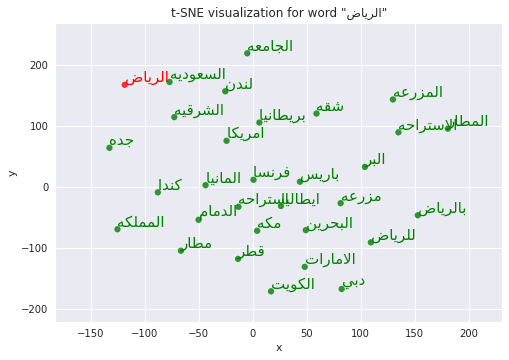

In [ ]:
# tsne plot for top 30 similar word to 'food'
tsne_plot(for_word='الرياض', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


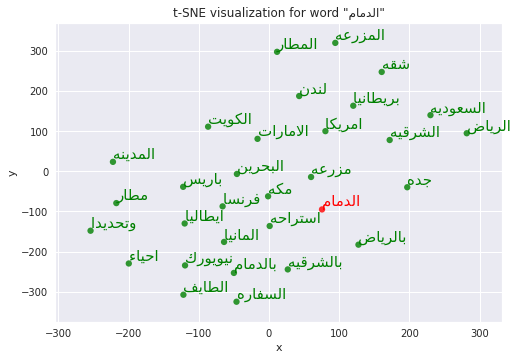

In [ ]:
tsne_plot(for_word='الدمام', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


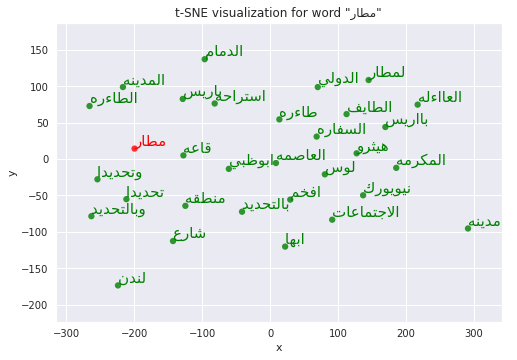

In [ ]:
tsne_plot(for_word='مطار', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


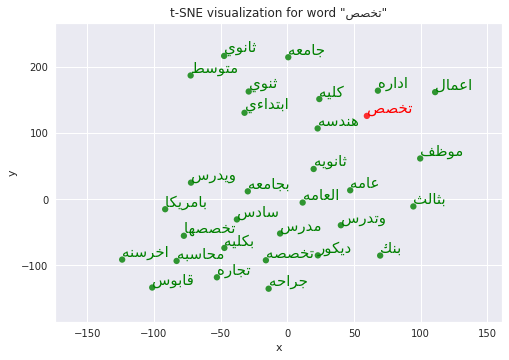

In [ ]:
tsne_plot(for_word='تخصص', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


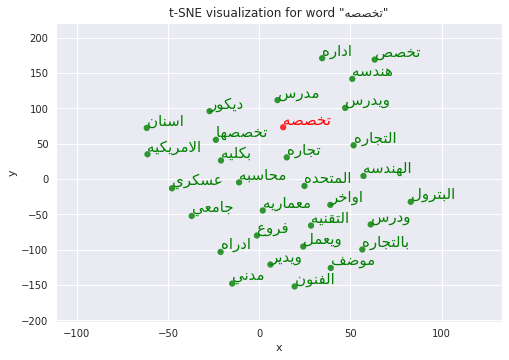

In [ ]:
tsne_plot(for_word='تخصصه', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


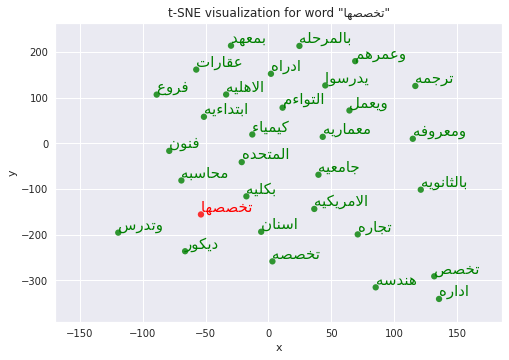

In [ ]:
tsne_plot(for_word='تخصصها', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


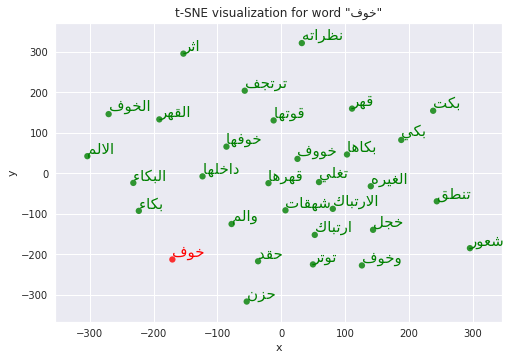

In [ ]:
tsne_plot(for_word='خوف', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


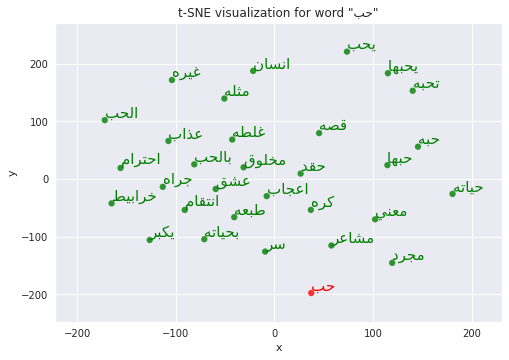

In [ ]:
tsne_plot(for_word='حب', w2v_model=w2v_model, topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


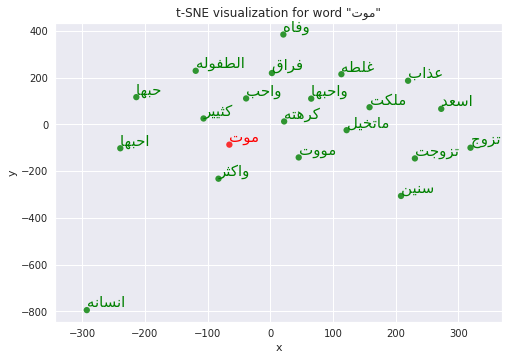

In [ ]:
tsne_plot(for_word='موت', w2v_model=w2v_model, topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


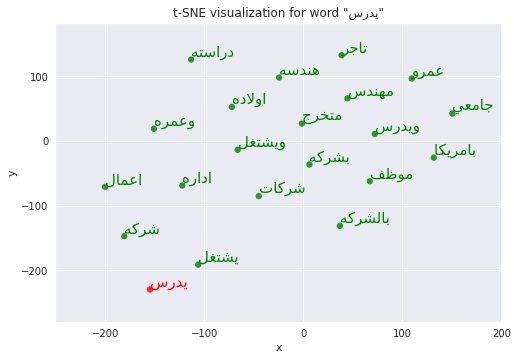

In [ ]:
tsne_plot(for_word='يدرس', w2v_model=w2v_model, topn=20)

# Step #2: K-mean clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
word_vectors = Word2Vec.load("/content/w2v_model").wv
model = KMeans(n_clusters=20, max_iter=1000, random_state=True, n_init=70).fit(X=word_vectors.vectors)
c1_cluster_center = model.cluster_centers_[0]
c2_cluster_center = model.cluster_centers_[1]
c3_cluster_center = model.cluster_centers_[2]
c4_cluster_center = model.cluster_centers_[3]
c5_cluster_center = model.cluster_centers_[4]
c6_cluster_center = model.cluster_centers_[5]
c7_cluster_center = model.cluster_centers_[6]
c8_cluster_center = model.cluster_centers_[7]
c9_cluster_center = model.cluster_centers_[8]
c10_cluster_center = model.cluster_centers_[9]
c11_cluster_center = model.cluster_centers_[10]
c12_cluster_center = model.cluster_centers_[11]
c13_cluster_center = model.cluster_centers_[12]
c14_cluster_center = model.cluster_centers_[13]
c15_cluster_center = model.cluster_centers_[14]
c16_cluster_center = model.cluster_centers_[15]
c17_cluster_center = model.cluster_centers_[16]
c18_cluster_center = model.cluster_centers_[17]
c19_cluster_center = model.cluster_centers_[18]
c20_cluster_center = model.cluster_centers_[19]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model.cluster_centers_

array([[ 1.8397216e-01,  3.8775361e-01,  2.1294045e-01, ...,
         3.6995563e-01,  5.9723353e-01,  3.5939375e-01],
       [-1.4087729e-01,  3.4411052e-01,  1.3878797e-01, ...,
         1.5718682e-01,  2.0062852e-01,  1.3894749e-01],
       [ 9.3070231e-04, -4.7719017e-01, -2.4177505e-01, ...,
        -1.1277798e+00,  1.1451632e-01, -2.6508245e-01],
       ...,
       [-4.7929409e-01,  7.4864721e-01,  6.4444482e-01, ...,
         8.5664034e-01,  1.9219053e-01,  3.4903169e-01],
       [-4.8005891e-01, -1.0942351e+00, -8.5342878e-01, ...,
        -7.3435450e-01,  6.6291678e-01,  2.4971327e-01],
       [ 9.7333699e-01, -1.7746541e-01, -1.6199076e-01, ...,
        -1.7590420e-02,  3.6761755e-01,  1.1510700e-02]], dtype=float32)

In [ ]:
# Get the cluster labels
print(model.labels_)

[ 7 13  7 ... 12 12 12]


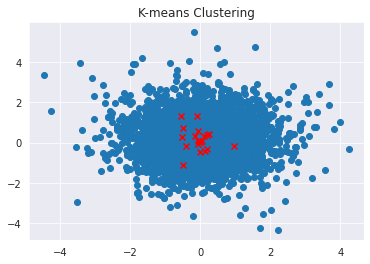

In [ ]:
import matplotlib.pyplot as plt
X = word_vectors.vectors
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('K-means Clustering')
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, model.labels_)) # see the score of K-means based on K=20

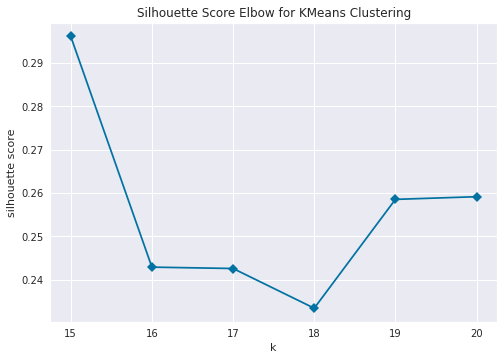

In [ ]:
# ref https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(15,21), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()  

## Clusters of Kmeans with K = 20

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=10, restrict_vocab=None) # تحيه ودعاء

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('يحييك', 0.8713173866271973),
 ('بالخير', 0.8589053750038147),
 ('يحيك', 0.8463480472564697),
 ('يبشرك', 0.8425016403198242),
 ('عسا', 0.8388503789901733),
 ('نوافالله', 0.8345466256141663),
 ('اميين', 0.8331339359283447),
 ('عقبالك', 0.8320373892784119),
 ('يوفقك', 0.8302472829818726),
 ('اشلونك', 0.8297774791717529)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None) # 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('نستحي', 0.9141894578933716),
 ('حنانلا', 0.8943694829940796),
 ('دولفين', 0.8938993215560913),
 ('كبرتوا', 0.8915839195251465),
 ('زووجك', 0.891396701335907),
 ('تميمهه', 0.8892174959182739),
 ('صاادقه', 0.8892155289649963),
 ('بفهمك', 0.8881510496139526),
 ('مارضيتي', 0.8854593634605408),
 ('يالريم', 0.8851284384727478)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[2], topn=10, restrict_vocab=None) # مكليتها وافعالها

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('البلكون', 0.849274754524231),
 ('واتجهت', 0.8485071659088135),
 ('بالشنطه', 0.8382887244224548),
 ('جنطتها', 0.8322901129722595),
 ('للصاله', 0.8319238424301147),
 ('شنطتها', 0.83073490858078),
 ('بالدرج', 0.829680860042572),
 ('غرفتهاا', 0.8254073858261108),
 ('للبااب', 0.8252967596054077),
 ('عباتها', 0.8223669528961182)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[3], topn=10, restrict_vocab=None) # مفعول به كلهم/ جمع

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('يتمشون', 0.9504281282424927),
 ('والشباب', 0.9240134954452515),
 ('لحالهم', 0.9234307408332825),
 ('بروحهم', 0.9226260185241699),
 ('قعدوا', 0.9226258993148804),
 ('يلعبون', 0.9119542837142944),
 ('يتغدون', 0.9118247032165527),
 ('يتعشون', 0.9108128547668457),
 ('قاموا', 0.9072945713996887),
 ('جلسو', 0.9068790674209595)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[4], topn=10, restrict_vocab=None) # the one that doesnt make sense

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('الضياعروايه', 0.9676347970962524),
 ('صدمتهاا', 0.9592486619949341),
 ('بحبال', 0.957331657409668),
 ('بالفخر', 0.9520395398139954),
 ('بالفرنسيه', 0.948965311050415),
 ('نسجت', 0.9478399753570557),
 ('تعين', 0.9475455284118652),
 ('بداخلهم', 0.9474512338638306),
 ('وجوهره', 0.9472347497940063),
 ('ويذوب', 0.9472220540046692)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[5], topn=10, restrict_vocab=None) # مشاعر واسماء اشاره / فصحى

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('الذءاب', 0.9363851547241211),
 ('التجاهل', 0.9352132678031921),
 ('عاديا', 0.9341709613800049),
 ('سببا', 0.927890419960022),
 ('واحدا', 0.9276466369628906),
 ('العاطفه', 0.9274079203605652),
 ('الكبرياء', 0.9271470904350281),
 ('السلبيه', 0.9270921945571899),
 ('فحتي', 0.9269582033157349),
 ('الكثيرين', 0.9269578456878662)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[6], topn=10, restrict_vocab=None) # وصف ذكر

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ومتزوج', 0.9027059078216553),
 ('تاجر', 0.8825239539146423),
 ('ولدين', 0.8551281094551086),
 ('وعمره', 0.8533135652542114),
 ('بسن', 0.8429934978485107),
 ('وعندها', 0.8418825268745422),
 ('الاكبر', 0.8391786217689514),
 ('اكبرهم', 0.8379554748535156),
 ('بعمر', 0.8372987508773804),
 ('وعمرها', 0.836063802242279)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[7], topn=10, restrict_vocab=None) # مشاعر انثى

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ترفضه', 0.7920140624046326),
 ('تعرفه', 0.7841296792030334),
 ('تعترف', 0.7798193097114563),
 ('تحبه', 0.7783197164535522),
 ('حبته', 0.7780690789222717),
 ('ماتبيه', 0.7771444320678711),
 ('ماتوقع', 0.7698715925216675),
 ('بيحبها', 0.7658661603927612),
 ('رفضته', 0.7643246650695801),
 ('ينساها', 0.7626936435699463)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[8], topn=50, restrict_vocab=None) # اسماء ذكور

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('جهاد', 0.9068551063537598),
 ('عبدالرحمن', 0.8935765027999878),
 ('سطام', 0.8805962800979614),
 ('سعد', 0.8780695199966431),
 ('فواز', 0.8734748363494873),
 ('مصعب', 0.8707113265991211),
 ('بسام', 0.87062007188797),
 ('سلمان', 0.8551400899887085),
 ('حسين', 0.8544862270355225),
 ('عزام', 0.8520472645759583),
 ('عدنان', 0.8497920036315918),
 ('الوليد', 0.8493483662605286),
 ('صقر', 0.8458620309829712),
 ('مساعد', 0.8456939458847046),
 ('حسن', 0.8438045382499695),
 ('سليمان', 0.842998743057251),
 ('ثامر', 0.8402153253555298),
 ('عبدالعزيز', 0.8396210670471191),
 ('ضاري', 0.8362278342247009),
 ('غسان', 0.8353347182273865),
 ('فايز', 0.8350222706794739),
 ('حاتم', 0.8300532102584839),
 ('ليث', 0.8266993165016174),
 ('عادل', 0.8254269361495972),
 ('دانيال', 0.8252283334732056),
 ('عامر', 0.8225237727165222),
 ('لءي', 0.8210697174072266),
 ('مازن', 0.8174054026603699),
 ('مطلق', 0.8162646293640137),
 ('بشار', 0.8145625591278076),
 ('صالح', 0.8144093155860901),
 ('راءد', 0.8142817616462708

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[9], topn=10, restrict_vocab=None) # افعال ذكر

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('يلف', 0.855373740196228),
 ('ويمشي', 0.8389443159103394),
 ('مسكه', 0.8294141888618469),
 ('يعدل', 0.8260941505432129),
 ('يضربه', 0.8152909278869629),
 ('وقفته', 0.8140721917152405),
 ('لقاه', 0.8126593828201294),
 ('ويلف', 0.8079771995544434),
 ('وقام', 0.8059951066970825),
 ('تافف', 0.8057223558425903)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[10], topn=200, restrict_vocab=None) # اماكن واجازه و فترات من الزمن

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('رمضان', 0.8658555150032043),
 ('الاجازه', 0.8619747757911682),
 ('الرحله', 0.8581311702728271),
 ('العطله', 0.8450356721878052),
 ('العزا', 0.8430027365684509),
 ('اياام', 0.8313381671905518),
 ('ايطاليا', 0.8283120393753052),
 ('امتحانات', 0.8265349864959717),
 ('عطله', 0.8260310292243958),
 ('رحلتنا', 0.825415849685669),
 ('الموعد', 0.8240470886230469),
 ('النهاءيه', 0.8234704732894897),
 ('اختبارات', 0.8221327066421509),
 ('الدمام', 0.8205077648162842),
 ('المدارس', 0.8155180215835571),
 ('الاختبارات', 0.8152377605438232),
 ('تسعه', 0.8129345774650574),
 ('قطر', 0.8114370107650757),
 ('رحلتهم', 0.8113664388656616),
 ('البحرين', 0.8100677728652954),
 ('مكه', 0.8097302913665771),
 ('الصيفيه', 0.8092032670974731),
 ('الاسبوعين', 0.8070207834243774),
 ('للندن', 0.8038635849952698),
 ('لندن', 0.8015412092208862),
 ('دوامك', 0.800909161567688),
 ('رحله', 0.7988049983978271),
 ('للرياض', 0.7962461709976196),
 ('الرجعه', 0.7956709861755371),
 ('الامارات', 0.7948887348175049),
 ('الامتحان

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[11], topn=10, restrict_vocab=None) # افعال واوامر ذكر

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('بجي', 0.8610562086105347),
 ('باروح', 0.8526448011398315),
 ('ابروح', 0.8514530658721924),
 ('واجي', 0.844003438949585),
 ('برووح', 0.8434795141220093),
 ('بقوم', 0.8388229608535767),
 ('بجيك', 0.8375989198684692),
 ('اوصلك', 0.8349348306655884),
 ('وبجي', 0.8338634967803955),
 ('بمرك', 0.8335396647453308)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[12], topn=10, restrict_vocab=None) # خرابيط 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('الضياعروايه', 0.975426435470581),
 ('بحبال', 0.9615311622619629),
 ('صدمتهاا', 0.9567416906356812),
 ('وجوهره', 0.9540071487426758),
 ('ابتلاني', 0.9525933265686035),
 ('نوراان', 0.9515731334686279),
 ('بالفخر', 0.9502874612808228),
 ('بالفرنسيه', 0.9496270418167114),
 ('نسجت', 0.9458926916122437),
 ('اسرتك', 0.9426789283752441)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[13], topn=10, restrict_vocab=None) # مظهر انثى

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('المعطف', 0.9272850751876831),
 ('بالكريستال', 0.9263520240783691),
 ('واللبست', 0.9261937737464905),
 ('بكسسل', 0.9239856004714966),
 ('بدرج', 0.9236646294593811),
 ('الكومدينو', 0.9217299222946167),
 ('بالاستشوار', 0.9205886721611023),
 ('وعباتها', 0.9193708896636963),
 ('ولبسهاا', 0.9165201187133789),
 ('ارجلها', 0.9158598780632019)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[14], topn=10, restrict_vocab=None) # اعلام و افعال خرابيط

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('شمه', 0.9155896902084351),
 ('امايه', 0.9141298532485962),
 ('ميره', 0.9132096767425537),
 ('يدوه', 0.8979091644287109),
 ('الحينه', 0.8922337293624878),
 ('اميه', 0.8851891756057739),
 ('يدووه', 0.8841700553894043),
 ('شما', 0.8838256597518921),
 ('ميثه', 0.8836300373077393),
 ('فطامي', 0.8815940618515015)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[15], topn=50, restrict_vocab=None) # اسماء بنات

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('هيفا', 0.9059562087059021),
 ('بشاير', 0.8712940216064453),
 ('جنا', 0.868615984916687),
 ('اشواق', 0.8654142618179321),
 ('ريهام', 0.86537104845047),
 ('نجلا', 0.8645761013031006),
 ('تهاني', 0.8576951026916504),
 ('ناديه', 0.8563284873962402),
 ('اسيل', 0.8533920049667358),
 ('مي', 0.8507458567619324),
 ('ولاء', 0.8462757468223572),
 ('سجي', 0.8446791172027588),
 ('اماني', 0.8445020914077759),
 ('بيان', 0.8432742357254028),
 ('سهي', 0.8421467542648315),
 ('هنادي', 0.8418000936508179),
 ('شروق', 0.8416056632995605),
 ('اروي', 0.8415917158126831),
 ('غيداء', 0.841279923915863),
 ('ريماس', 0.8391819000244141),
 ('فاتن', 0.8388935327529907),
 ('البتول', 0.8385205268859863),
 ('كادي', 0.8366430997848511),
 ('هنوف', 0.8364824652671814),
 ('درر', 0.8350480794906616),
 ('رانيا', 0.8320619463920593),
 ('ديما', 0.8309493064880371),
 ('ديم', 0.829413890838623),
 ('ابرار', 0.8286620378494263),
 ('رزان', 0.827064573764801),
 ('ابتسام', 0.8269985318183899),
 ('فتون', 0.8267092108726501),
 ('رءي

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[16], topn=10, restrict_vocab=None) # صفتها 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('بيدينها', 0.8872052431106567),
 ('لصدرها', 0.8721601366996765),
 ('ترتجف', 0.8549323081970215),
 ('ترجف', 0.8496814966201782),
 ('وبكت', 0.8375608325004578),
 ('بايديها', 0.8373680114746094),
 ('دفته', 0.8366740942001343),
 ('ارتمت', 0.8363819122314453),
 ('ارتجفت', 0.8308106660842896),
 ('وشهقت', 0.8233438730239868)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[17], topn=10, restrict_vocab=None) # negative emotions male

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ماتبيني', 0.8308722376823425),
 ('قلتلك', 0.8265172243118286),
 ('اعصب', 0.8254634737968445),
 ('اعلمك', 0.8112436532974243),
 ('اقلك', 0.8109066486358643),
 ('تحبيني', 0.810506284236908),
 ('بكيفي', 0.8087542057037354),
 ('كيفي', 0.808514416217804),
 ('لاوالله', 0.7906714677810669),
 ('ليشش', 0.7890443801879883)]

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[18], topn=50, restrict_vocab=None) # وصف واكثره الوان

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('بنفسجي', 0.9754642844200134),
 ('رمادي', 0.9719678163528442),
 ('اخضر', 0.9644105434417725),
 ('ذهبي', 0.9637944102287292),
 ('لونها', 0.963448166847229),
 ('اسوود', 0.9617246985435486),
 ('زهري', 0.9616559743881226),
 ('حرير', 0.9612627029418945),
 ('زيتي', 0.9607090950012207),
 ('ورديه', 0.9600721001625061),
 ('ازرق', 0.9599131345748901),
 ('غامق', 0.9591885805130005),
 ('ولونه', 0.9589741826057434),
 ('فوشي', 0.9539130926132202),
 ('سودا', 0.9527685642242432),
 ('ومكياجها', 0.952000617980957),
 ('سماويه', 0.9511860013008118),
 ('فوشيه', 0.9509077668190002),
 ('مايل', 0.9493594169616699),
 ('كحلي', 0.9491046667098999),
 ('كت', 0.9485905766487122),
 ('برتقالي', 0.948425829410553),
 ('رصاصي', 0.9479429721832275),
 ('لونهاا', 0.9470193982124329),
 ('تفاحي', 0.9468988180160522),
 ('اورنج', 0.9465968608856201),
 ('سماوي', 0.9461533427238464),
 ('لوونه', 0.9451258182525635),
 ('موف', 0.9444487690925598),
 ('سوده', 0.9444342851638794),
 ('وكحل', 0.9436089992523193),
 ('وشعرهاا', 0.943213

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[19], topn=10, restrict_vocab=None) # فصحى واسماء اجانب

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('بذلك', 0.9580165147781372),
 ('مجددا', 0.9463838338851929),
 ('طويلا', 0.9424797892570496),
 ('امامي', 0.9408862590789795),
 ('بالتاكيد', 0.9384540915489197),
 ('لذلك', 0.9365878105163574),
 ('اليزا', 0.9333150386810303),
 ('نيكوس', 0.9311233758926392),
 ('حتما', 0.9306283593177795),
 ('رءيه', 0.929473340511322)]

#save clusters in df

In [ ]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster] # use it if you are doing Postive VS Negative

words['cluster_value'] = [i if i!=-1 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score
# words['sentiment_coeff'] = words.closeness_score * words.cluster_value # use it if you are doing Postive VS Negative

In [ ]:
words.head()

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,الي,"[1.6669604, 0.68389505, -2.0940554, 0.82911724...",14,14,0.058382,0.058382
1,عشاق,"[-0.027683616, 0.031286366, -0.0541276, 0.0900...",1,1,1.092375,1.092375
2,الجزء,"[-0.7789387, -0.84765476, -0.6505394, -4.68897...",0,0,0.068513,0.068513
3,الاول,"[-0.65885484, -0.45257756, -0.53933984, -0.962...",0,0,0.098029,0.098029
4,اصرخ,"[0.7010557, 0.17957303, 0.17362429, 1.2394274,...",14,14,0.197995,0.197995


In [ ]:
words[['words', 'vectors', 'cluster', 'closeness_score']].to_csv('sentiment_dictionary.csv', index=False)

#Step #3 Analysis

## Names (Female vs Male)

In [ ]:
df_names = words.copy()

In [ ]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109689 entries, 0 to 109688
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   words            109689 non-null  object 
 1   vectors          109689 non-null  object 
 2   cluster          109689 non-null  int64  
 3   cluster_value    109689 non-null  int64  
 4   closeness_score  109689 non-null  float64
 5   sentiment_coeff  109689 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.0+ MB


In [ ]:
df_names.drop(['cluster_value', 'sentiment_coeff'], axis=1, inplace=True )
df_names.reset_index(drop=True, inplace=True)

In [ ]:
df_female = df_names[df_names.cluster == 8]
df_female.reset_index(drop=True, inplace=True)

In [ ]:
df_female.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   words            359 non-null    object 
 1   vectors          359 non-null    object 
 2   cluster          359 non-null    int64  
 3   closeness_score  359 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [ ]:
df_female.to_csv('df_female.csv', index=False)

In [ ]:
df_male = df_names[df_names.cluster == 9]
df_male.reset_index(drop=True, inplace=True)

In [ ]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   words            168 non-null    object 
 1   vectors          168 non-null    object 
 2   cluster          168 non-null    int64  
 3   closeness_score  168 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


In [ ]:
df_male.to_csv('df_male.csv', index=False)

In [ ]:
# ref: https://thinkinfi.com/gensim-word2vec-python-implementation/
# tsne plot for below word
# for_word = 'الرياض'
# topn = 30
# for_word = 9
# topn = 30
def tsne_plot(for_word, cluster, word_vectors, topn = topn):
    # trained word2vec model dimention
    dim_size = word_vectors.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, word_vectors.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = word_vectors.similar_by_vector(model.cluster_centers_[cluster], topn=topn, restrict_vocab=None)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = word_vectors.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention -------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = topn).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python --------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop

    for line in range(0, df_plot.shape[0]):
      reshaped_text = arabic_reshaper.reshape('  ' + df_plot["words_name"][line].title())
      artext = get_display(reshaped_text)
      
      plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 artext,
                 name = 'Arial',
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    reshaped_text = arabic_reshaper.reshape(for_word.title())
    artext = get_display(reshaped_text)

    plt.title('t-SNE visualization for Cluster ()')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


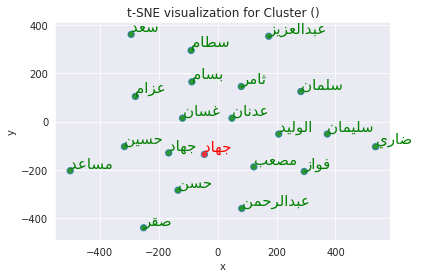

In [ ]:
tsne_plot('جهاد', cluster=8, word_vectors=word_vectors, topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


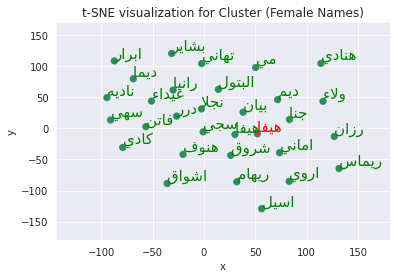

In [ ]:
tsne_plot('هيفا', cluster=15, word_vectors=word_vectors, topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


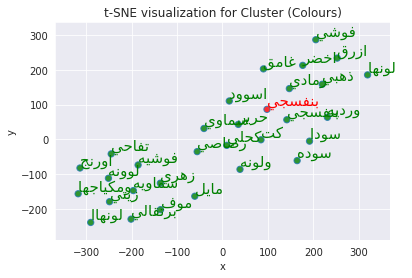

In [ ]:
tsne_plot('بنفسجي', cluster=18, word_vectors=word_vectors, topn = 30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


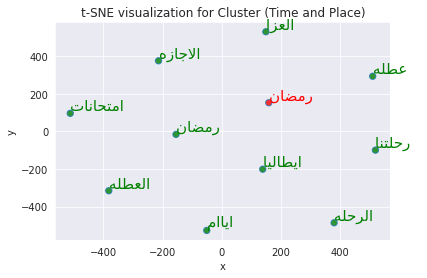

In [ ]:
tsne_plot('رمضان', cluster=10, word_vectors=word_vectors, topn = 10)